# Lab 3 Report

## Group Members: Diego C.
## Group Name for Leaderboard: Dieglan

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image 
%matplotlib inline
import math
#from numpy import transpose

### Exercise 1: Generalized function for subsetting pixels

<img src="lab3_exercise1.png" width="800">

In [38]:
e1_img = Image.open('sample_image_1.jpg').convert('L')
e1_img = np.array(e1_img)     # 8-bit code grayscale

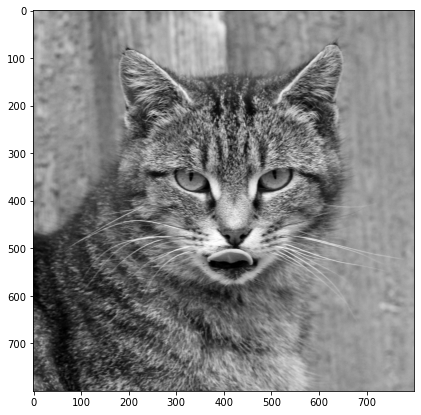

In [39]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e1_img, cmap = 'gray')

In [40]:
def subset_pixels(image, min_pixel_depth, max_pixel_depth, replacement_val):
    # Assigning output_image to default image so we have something to modify and return
    output_image = image
    # Parsing through the 2D array. For every set of numbers in the array
    for i in range(len(output_image)):
        # For every number in that set of numbers
        for j in range(len(output_image[i])):
            # If those numbers are less than or greater than the minimum and maximum pixel depths
            if output_image[i, j] < min_pixel_depth or output_image[i, j] > max_pixel_depth:
                # Change them to the replacement values
                output_image[i, j] = replacement_val
    # Return the modified image
    return output_image

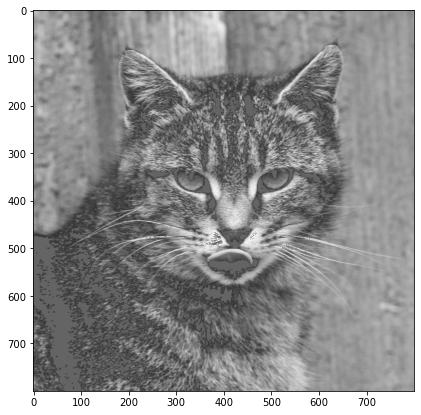

In [41]:
# min_pixel_depth = 50, max_pixel_depth = 250, replacement_val = 100

fig = plt.figure(figsize=(7, 7))

e1_output1 = subset_pixels(image = e1_img, min_pixel_depth = 50, max_pixel_depth = 250, replacement_val = 100)

plt.imshow(e1_output1, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output1.png')

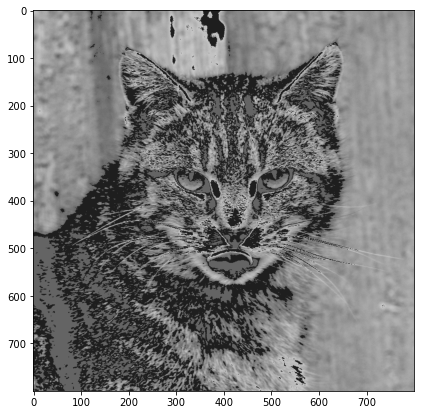

In [42]:
# min_pixel_depth = 100, max_pixel_depth = 200, replacement_val = 30

fig = plt.figure(figsize=(7, 7))

e1_output2 = subset_pixels(image = e1_img, min_pixel_depth = 100, max_pixel_depth = 200, replacement_val = 30)

plt.imshow(e1_output2, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output2.png')

In [43]:
# min_pixel_depth = 50, max_pixel_depth = 255, replacement_val = 255

fig = plt.figure(figsize=(7, 7))

e1_output3 = subset_pixels(image = e1_img, min_pixel_depth = 50, max_pixel_depth = 255, replacement_val = 255)

plt.imshow(e1_output3, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output3.png')

KeyboardInterrupt: 

<Figure size 504x504 with 0 Axes>

### Exercise 2: Thumbnail generator function

<img src="lab3_exercise2.png" width="800">

In [ ]:
e2_img = mpimg.imread('sample_image_2.jpg')
e2_img = np.array(e2_img)     

In [ ]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e2_img)

In [ ]:
def create_thumbnail(image, downsampling_rate):
#We're dividing the horizontal values by our downsampling rate
    region = downsampling_rate
#We're reshaping the horizontal values into a new 3x3 square in the reshape function call.
    a1 = image.shape[0] // region 
#The horizontal values are then put into a new 3x3 matrix in the reshape function call, then you are adding all the 
#values in each square up and dividing it by the whole region to get the average value
    return np.sum(np.sum(image.reshape(-1,region,a1,region,3),1),2) // region**2 
#outputs image after all these commands are performed
    return output_image

In [ ]:
# downsampling rate x5

fig = plt.figure(figsize=(7, 7))

e2_output1 = create_thumbnail(image = e2_img, downsampling_rate = 5)

plt.imshow(e2_output1, vmin = 0, vmax = 255)

# plt.savefig('e2_output1.png')

In [ ]:
# downsampling rate x10

fig = plt.figure(figsize=(7, 7))

e2_output2 = create_thumbnail(image = e2_img, downsampling_rate = 10)

plt.imshow(e2_output2, vmin = 0, vmax = 255)

plt.savefig('e2_output2.png')

In [ ]:
# downsampling rate x20

fig = plt.figure(figsize=(7, 7))

e2_output3 = create_thumbnail(image = e2_img, downsampling_rate = 20)

plt.imshow(e2_output3, vmin = 0, vmax = 255)

plt.savefig('e2_output3.png')

## Extra credit: Code efficiency
### Achieve a runtime speed of < 5ms

In [ ]:
timeit -n 100 -r 7 e2_output2 = create_thumbnail(image = e2_img, downsampling_rate = 5)

### Exercise 3: Generalized image blender function

<img src="lab3_exercise3.png" width="800">

In [ ]:
e3_img1 = mpimg.imread('sample_image_1.jpg')
e3_img2 = mpimg.imread('sample_image_2.jpg')
e3_img3 = mpimg.imread('sample_image_3.jpg')
e3_img4 = mpimg.imread('sample_image_4.jpg')
e3_img5 = mpimg.imread('sample_image_5.jpg')

e3_img1 = np.array(e3_img1)     
e3_img2 = np.array(e3_img2)     
e3_img3 = np.array(e3_img3)     
e3_img4 = np.array(e3_img4)     
e3_img5 = np.array(e3_img5)     

In [ ]:
fig = plt.figure(figsize=(15, 15))

plt.subplot(1,5,1)
plt.imshow(e3_img1, vmin = 0, vmax = 255)

plt.subplot(1,5,2)
plt.imshow(e3_img2, vmin = 0, vmax = 255)

plt.subplot(1,5,3)
plt.imshow(e3_img3, vmin = 0, vmax = 255)

plt.subplot(1,5,4)
plt.imshow(e3_img4, vmin = 0, vmax = 255)

plt.subplot(1,5,5)
plt.imshow(e3_img5, vmin = 0, vmax = 255)

In [44]:
def blend_images(image_list, weight_list):
    # When we run out of weight values, we should stop considering blending additional images
    index = len(weight_list)
    # For all pictures that have a weight 
    for i in range(0, index):
        # Image that we are blending
        b_image = image_list[i]
        # Weight of the image mentioned above
        b_weight = weight_list[i]
        # If the index is zero, we just have one image, so no need to do any blending
        if i == 0:
            b_red = b_weight * b_image[:, :, 0]
            b_green = b_weight * b_image[:, :, 1]
            b_blue = b_weight * b_image[:, :, 2]
        # Blend the images, the previous blended image is saved as output_image already
        else:
            b_red = output_image[:, :, 0] + b_weight * b_image[:, :, 0]
            b_green = output_image[:, :, 1] + b_weight * b_image[:, :, 1]
            b_blue = output_image[:, :, 2] + b_weight * b_image[:, :, 2]
        # Compile into a blended image, save it as output_image in case we need to blend again
        output_image = np.stack([b_red, b_green, b_blue], axis = 2)
    # Convert pixel values to integers
    output_image = output_image.astype('int')
    # Return fully blended image
    return output_image

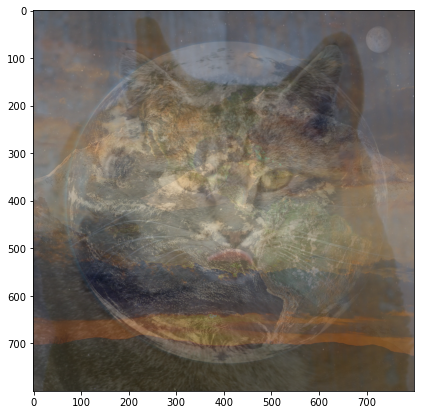

In [45]:
# Blend all 5 images with equal weights

e3_part1_image_list =[e3_img1, e3_img2, e3_img3, e3_img4, e3_img5]
e3_part1_weight_list = [0.2, 0.2, 0.2, 0.2, 0.2]

e3_output1 = blend_images(image_list = e3_part1_image_list, weight_list = e3_part1_weight_list)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e3_output1, vmin = 0, vmax = 255)

plt.savefig('e3_output1.png')

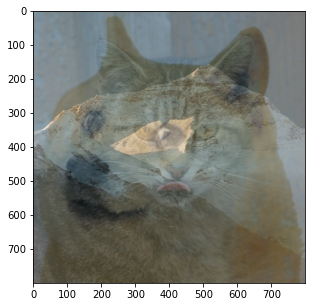

In [46]:
# Blend first 3 images with different weights

e3_part2_image_list =[e3_img1, e3_img2, e3_img3]
e3_part2_weight_list = [0.2, 0.3, 0.5]

e3_output2 = blend_images(image_list = e3_part2_image_list, weight_list = e3_part2_weight_list)

fig = plt.figure(figsize=(5, 5))

plt.imshow(e3_output2, vmin = 0, vmax = 255)

plt.savefig('e3_output2.png')

### Exercise 4: Image rotation function

<img src="lab3_exercise4.png" width="800">

In [20]:
e4_img = mpimg.imread('sample_image_2.jpg')
e4_img = np.array(e4_img)     

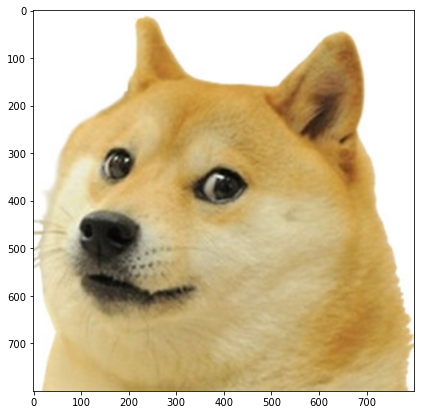

In [21]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_img, vmin = 0, vmax = 255)

In [22]:
def rotate_image(image, rotate_angle): # rotate angle takes one of 0, 90, 180, 270
    output_image = image.swapaxes(0,1)
    output_image = np.fliplr(output_image)
    return output_image

Since the above case only rotates 90 degrees everytime it is called, this following code will produce the right outputs for the other given test cases (rotation possible when only called once - uses transformation matrix). Double click on cell to see properly.

def rotate_image(image, rotate_angle): # rotate angle takes one of 0, 90, 180, 270
    # Convert degrees measurement to radian
    angle = math.radians(rotate_angle)
    # Create empty array with same dimensions as the image
    output_image = np.uint8(np.zeros(image.shape))
    # Get height of image array
    height = image.shape[0]
    # Get width of image array
    width = image.shape[1]
    # // operator performs floor division, rounding down to nearest whole number
    # Finding the center of the image
    c_x, c_y = (width // 2, height // 2)
    # For every combination of coordinates for the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Rotation matrix is [(cos, sin), (-sin, cos)] [(x,y)]
            x = round((i - c_x) * math.cos(angle) + (j - c_y) * math.sin(angle)) + c_x
            y = round(-(i - c_x) * math.sin(angle) + (j - c_y) * math.cos(angle)) + c_y
            # If check to make sure that the coordinates are not negative and that
            # we are not working with coordinates that exceed the image size
            if x >= 0 and y >= 0 and x < height and y < width:
                output_image[i, j, :] = image[x, y, :]
    return output_image

In [23]:
e4_img[0].shape

(800, 3)

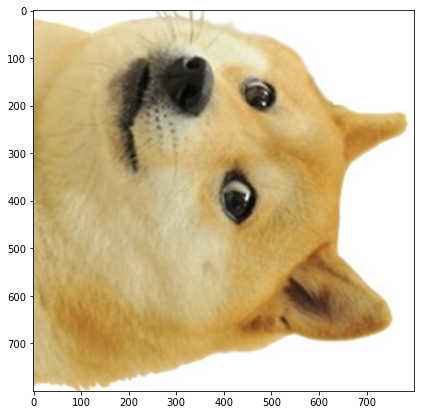

In [24]:
# Rotate the image by 0 degrees - This should result in identity

e4_output1 = rotate_image(image = e4_img, rotate_angle = 0)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output1, vmin = 0, vmax = 255)

plt.savefig('e4_output1.png')

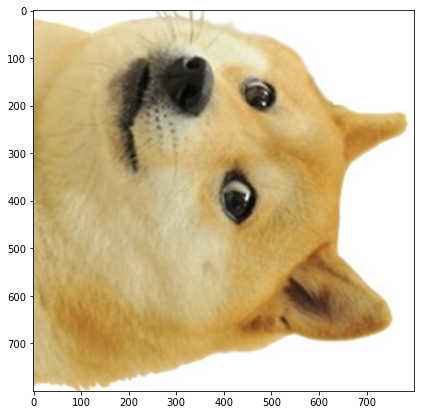

In [25]:
# Rotate the image by 90 degrees

e4_output2 = rotate_image(image = e4_img, rotate_angle = 90)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output2, vmin = 0, vmax = 255)

plt.savefig('e4_output2.png')

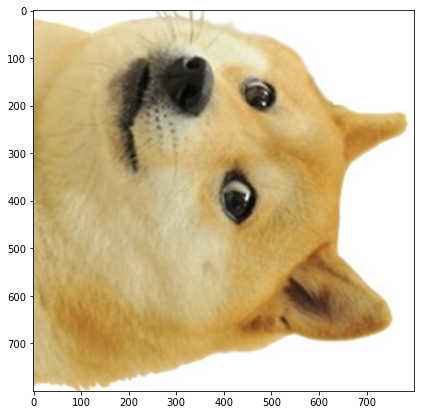

In [26]:
# Rotate the image by 180 degrees

e4_output3 = rotate_image(image = e4_img, rotate_angle = 180)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output3, vmin = 0, vmax = 255)

plt.savefig('e4_output3.png')

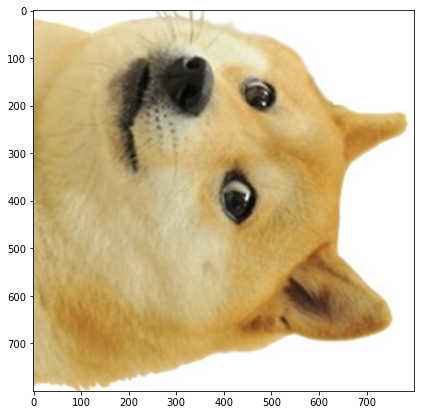

In [27]:
# Rotate the image by 270 degrees

e4_output4 = rotate_image(image = e4_img, rotate_angle = 270)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output4, vmin = 0, vmax = 255)

plt.savefig('e4_output4.png')

## Extra credit: Code efficiency
### Achieve a runtime speed of < 1ms

In [28]:
timeit -n 1 -r 7 e4_output2 = rotate_image(image = e4_img, rotate_angle = 90)

The slowest run took 5.75 times longer than the fastest. This could mean that an intermediate result is being cached.
5.59 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 5: 2D Gaussian image generator

<img src="lab3_exercise5.png" width="800">

In [29]:
x_range = np.arange(-25, 25, 1)
y_range = np.arange(-25, 25, 1)[::-1]

X, Y = np.meshgrid(x_range, y_range) # More detail on documentation 
                                     # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [30]:
print(X, X.shape) # Set of x-coordinates in the function domain     

[[-25 -24 -23 ...  22  23  24]
 [-25 -24 -23 ...  22  23  24]
 [-25 -24 -23 ...  22  23  24]
 ...
 [-25 -24 -23 ...  22  23  24]
 [-25 -24 -23 ...  22  23  24]
 [-25 -24 -23 ...  22  23  24]] (50, 50)


In [31]:
print(Y, Y.shape) # Set of y-coordinates in the function domain   

[[ 24  24  24 ...  24  24  24]
 [ 23  23  23 ...  23  23  23]
 [ 22  22  22 ...  22  22  22]
 ...
 [-23 -23 -23 ... -23 -23 -23]
 [-24 -24 -24 ... -24 -24 -24]
 [-25 -25 -25 ... -25 -25 -25]] (50, 50)


In [32]:
def vis_2d_gaussian(X, Y, sigma_x, sigma_y, x0, y0, A, cmap):
    # Gauss equation
    gauss = A * np.exp(-1/2 * ((X-x0) ** 2 / sigma_x ** 2 + (Y - y0) ** 2 / sigma_y ** 2))
    # Plotting it
    plt.imshow(gauss, cmap = cmap, vmin = 0, vmax = 255)


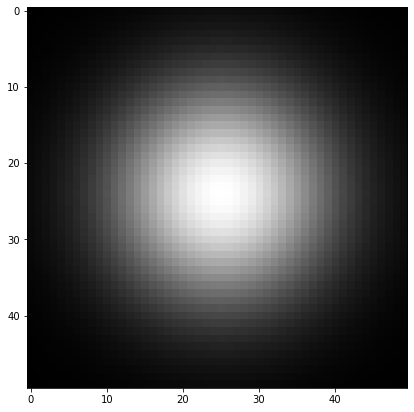

In [33]:
# First parameter set: sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0
# cmap = 'gray'

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0, A = 255, cmap = 'gray')

plt.savefig('e5_output1.png')

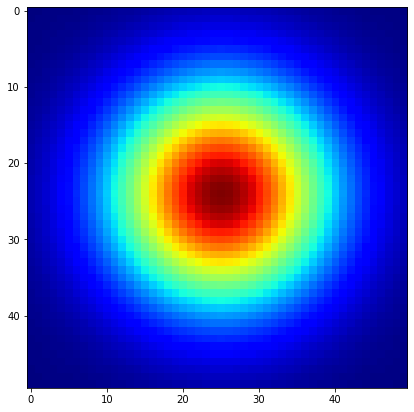

In [34]:
# First parameter set
# cmap = 'jet'

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0, A = 255, cmap = 'jet')

plt.savefig('e5_output2.png')

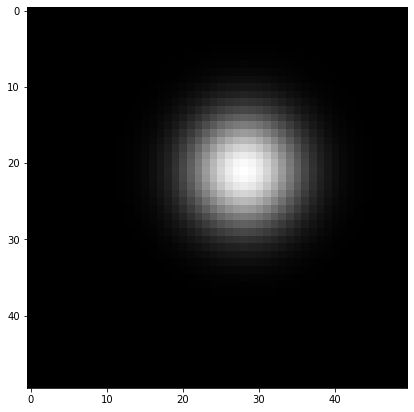

In [35]:
# Second parameter set: sigma_x = 5, sigma_y = 5, x0 = 3, y = 3
# grayscale color specturm

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 5, sigma_y = 5, x0 = 3, y0 = 3, A = 255, cmap = 'gray')

plt.savefig('e5_output1.png')

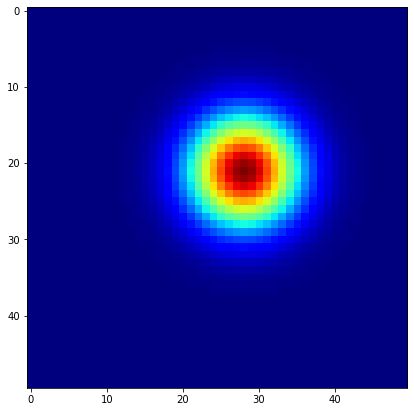

In [36]:
# Second parameter set: sigma_x = 5, sigma_y = 5, x0 = 3, y = 3
# jet color specturm

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 5, sigma_y = 5, x0 = 3, y0 = 3, A = 255, cmap = 'jet')

plt.savefig('e5_output2.png')